# 2. Feature Engineering

In [1]:
import pandas as pd

from paths import PROCESSED_CSV_FILE, ENGINEERED_CSV_FILE, FEATURE_ENG_DIR, TARGETS
from ml_tools.data_exploration import info
info(full_info=False)

Available functions for data exploration:
get_features_targets, summarize_dataframe, show_null_columns, drop_columns_with_missing_data, clip_outliers_single, clip_outliers_multi, plot_correlation_heatmap, check_value_distributions, plot_value_distributions, merge_dataframes, split_continuous_and_binary, save_dataframe, compute_vif, drop_vif_based


In [2]:
from ml_tools.data_exploration import get_features_targets, summarize_dataframe, show_null_columns, drop_columns_with_missing_data, clip_outliers_multi, plot_correlation_heatmap, check_value_distributions, plot_value_distributions, merge_dataframes, split_continuous_and_binary, save_dataframe

## 1. Get datasets with Splits (Features, Target)

In [3]:
df, df_targets, df_features = get_features_targets(df_path=PROCESSED_CSV_FILE, targets=TARGETS)

Original shape: (1220, 126)
Targets shape: (1220, 3)
Features shape: (1220, 123)


## 2. Explore Data

In [4]:
summarize_dataframe(df_features)

,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
coating_material,float64,640,2,47.54,0.71,0.45,0.0,0.0,1.0,1.0,1.00
dopant_Li,int64,1220,2,0.00,0.00,0.06,0.0,0.0,0.0,0.0,1.00
dopant_B,int64,1220,2,0.00,0.02,0.14,0.0,0.0,0.0,0.0,1.00
dopant_C,int64,1220,2,0.00,0.00,0.03,0.0,0.0,0.0,0.0,1.00
dopant_N,int64,1220,2,0.00,0.03,0.17,0.0,0.0,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
molar_ratio_Se,float64,1220,3,0.00,0.01,0.10,0.0,0.0,0.0,0.0,2.00
molar_ratio_La,float64,1220,10,0.00,0.02,0.18,0.0,0.0,0.0,0.0,3.00
molar_ratio_Ce,float64,1220,2,0.00,0.00,0.05,0.0,0.0,0.0,0.0,1.00
molar_ratio_Gd,float64,1220,4,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.03


In [5]:
summarize_dataframe(df_targets)

,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
capacity(mAh/g),float64,1063,643,12.87,219.98,217.33,0.10,183.3,201.68,226.30,4850.0
capacity_retention(%),float64,974,375,20.16,71.31,30.62,1.03,59.7,83.00,92.57,100.0
first_coulombic_efficiency(%),float64,702,373,42.46,83.91,12.30,1.02,81.0,86.00,89.97,100.0


## 3. Null values

In [6]:
show_null_columns(df_features)

                             Missing Count  Missing %
annealing_time_3(hour)                1142      93.61
annealing_temperature_3(K)            1141      93.52
precursor_temperature                 1051      86.15
precursor_pH                          1045      85.66
particle_size_secondary(um)            818      67.05
annealing_time_2(hour)                 708      58.03
annealing_temperature_2(K)             688      56.39
particle_size_primary(um)              676      55.41
coating_material                       580      47.54
electrolyte_molarity                   517      42.38
polycrystalline                        461      37.79
cycles                                 379      31.07
annealing_time_1(hour)                 342      28.03
annealing_temperature_1(K)             320      26.23
solvent_DMC                            115       9.43
solvent_EC                             115       9.43
solvent_VC                             115       9.43
solvent_EMC                 

In [7]:
show_null_columns(df_targets)

                               Missing Count  Missing %
first_coulombic_efficiency(%)            518      42.46
capacity_retention(%)                    246      20.16
capacity(mAh/g)                          157      12.87


Drop columns with too many Null values from the main dataframe

In [8]:
df_lessnulls_features = drop_columns_with_missing_data(df_features, threshold=0.7)
show_null_columns(df_lessnulls_features)

Dropping columns with more than 70% missing data:
['precursor_pH', 'precursor_temperature', 'annealing_temperature_3(K)', 'annealing_time_3(hour)']
                             Missing Count  Missing %
particle_size_secondary(um)            818      67.05
annealing_time_2(hour)                 708      58.03
annealing_temperature_2(K)             688      56.39
particle_size_primary(um)              676      55.41
coating_material                       580      47.54
electrolyte_molarity                   517      42.38
polycrystalline                        461      37.79
cycles                                 379      31.07
annealing_time_1(hour)                 342      28.03
annealing_temperature_1(K)             320      26.23
solvent_DMC                            115       9.43
solvent_EC                             115       9.43
solvent_VC                             115       9.43
solvent_EMC                            115       9.43
solvent_PC                             115

## 4. Split features: Continuous - Binary

In [9]:
df_lessnulls_features_cont, df_lessnulls_features_bin = split_continuous_and_binary(df=df_lessnulls_features)

Continuous columns shape: (1220, 41)
Binary columns shape: (1220, 78)


## 5. Value Distributions

In [ ]:
check_value_distributions(df=df_lessnulls_features_cont, skip_cols_with_key="ratio")

In [ ]:
check_value_distributions(df=df_targets)

Plot all distributions to get correct clip values (except binary columns)

In [ ]:
plot_value_distributions(df=df_lessnulls_features_cont, save_dir=FEATURE_ENG_DIR)

In [ ]:
plot_value_distributions(df=df_targets, save_dir=FEATURE_ENG_DIR)

## 6. Clip values

Use maximum and minimum values to clip outliers

In [10]:
features_clip_dict = {"particle_size_primary(um)": (0.0,30.0),
                      "annealing_temperature_1(K)": (650.0,1225.0),
                      "annealing_time_1(hour)": (1.0,48.0),
                      "average_voltage(V)": (1.0,5.0),
                      }

df_lessnulls_clip_features_cont = clip_outliers_multi(df=df_lessnulls_features_cont, clip_dict=features_clip_dict,)

## 7. Correlation Heatmap

Continuous features

Saved correlation heatmap to: /home/karl/lithium_battery/data/Feature Engineering/Continuous Features Correlation Heatmap.svg


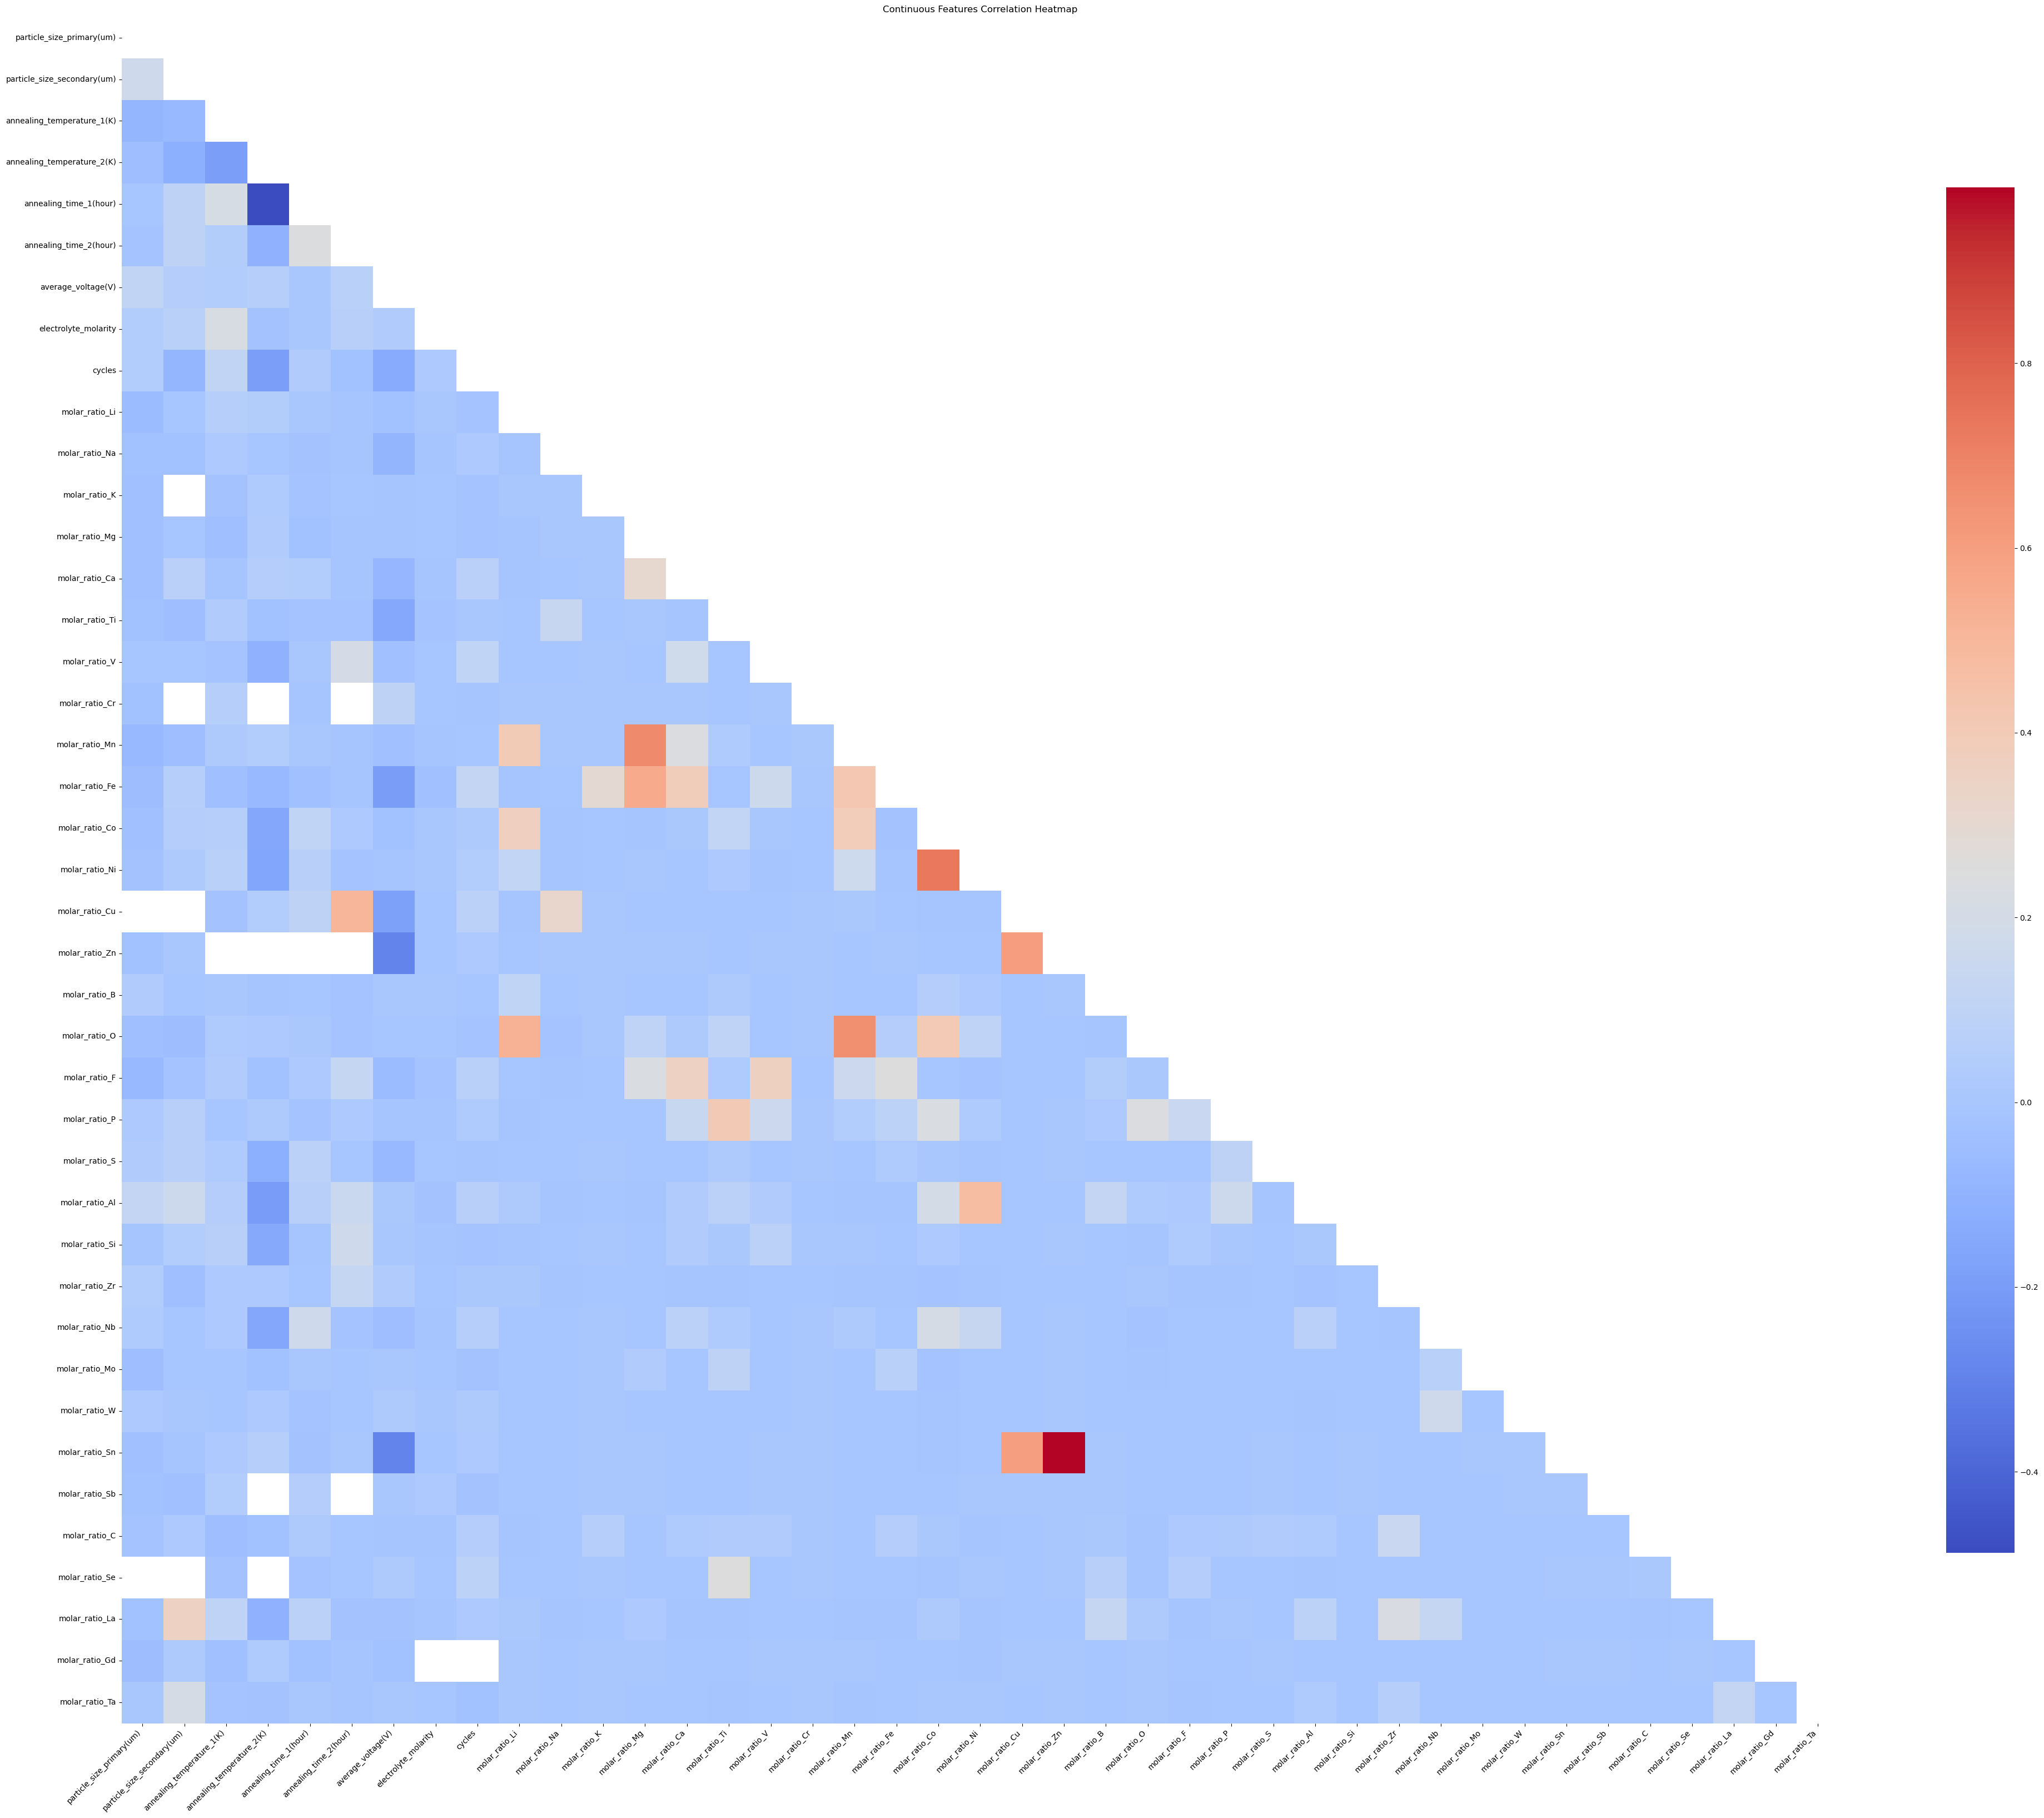

In [11]:
plot_correlation_heatmap(df=df_lessnulls_clip_features_cont, save_dir=FEATURE_ENG_DIR, plot_title="Continuous Features Correlation Heatmap")

Binary features

Saved correlation heatmap to: /home/karl/lithium_battery/data/Feature Engineering/Binary Features Correlation Heatmap.svg


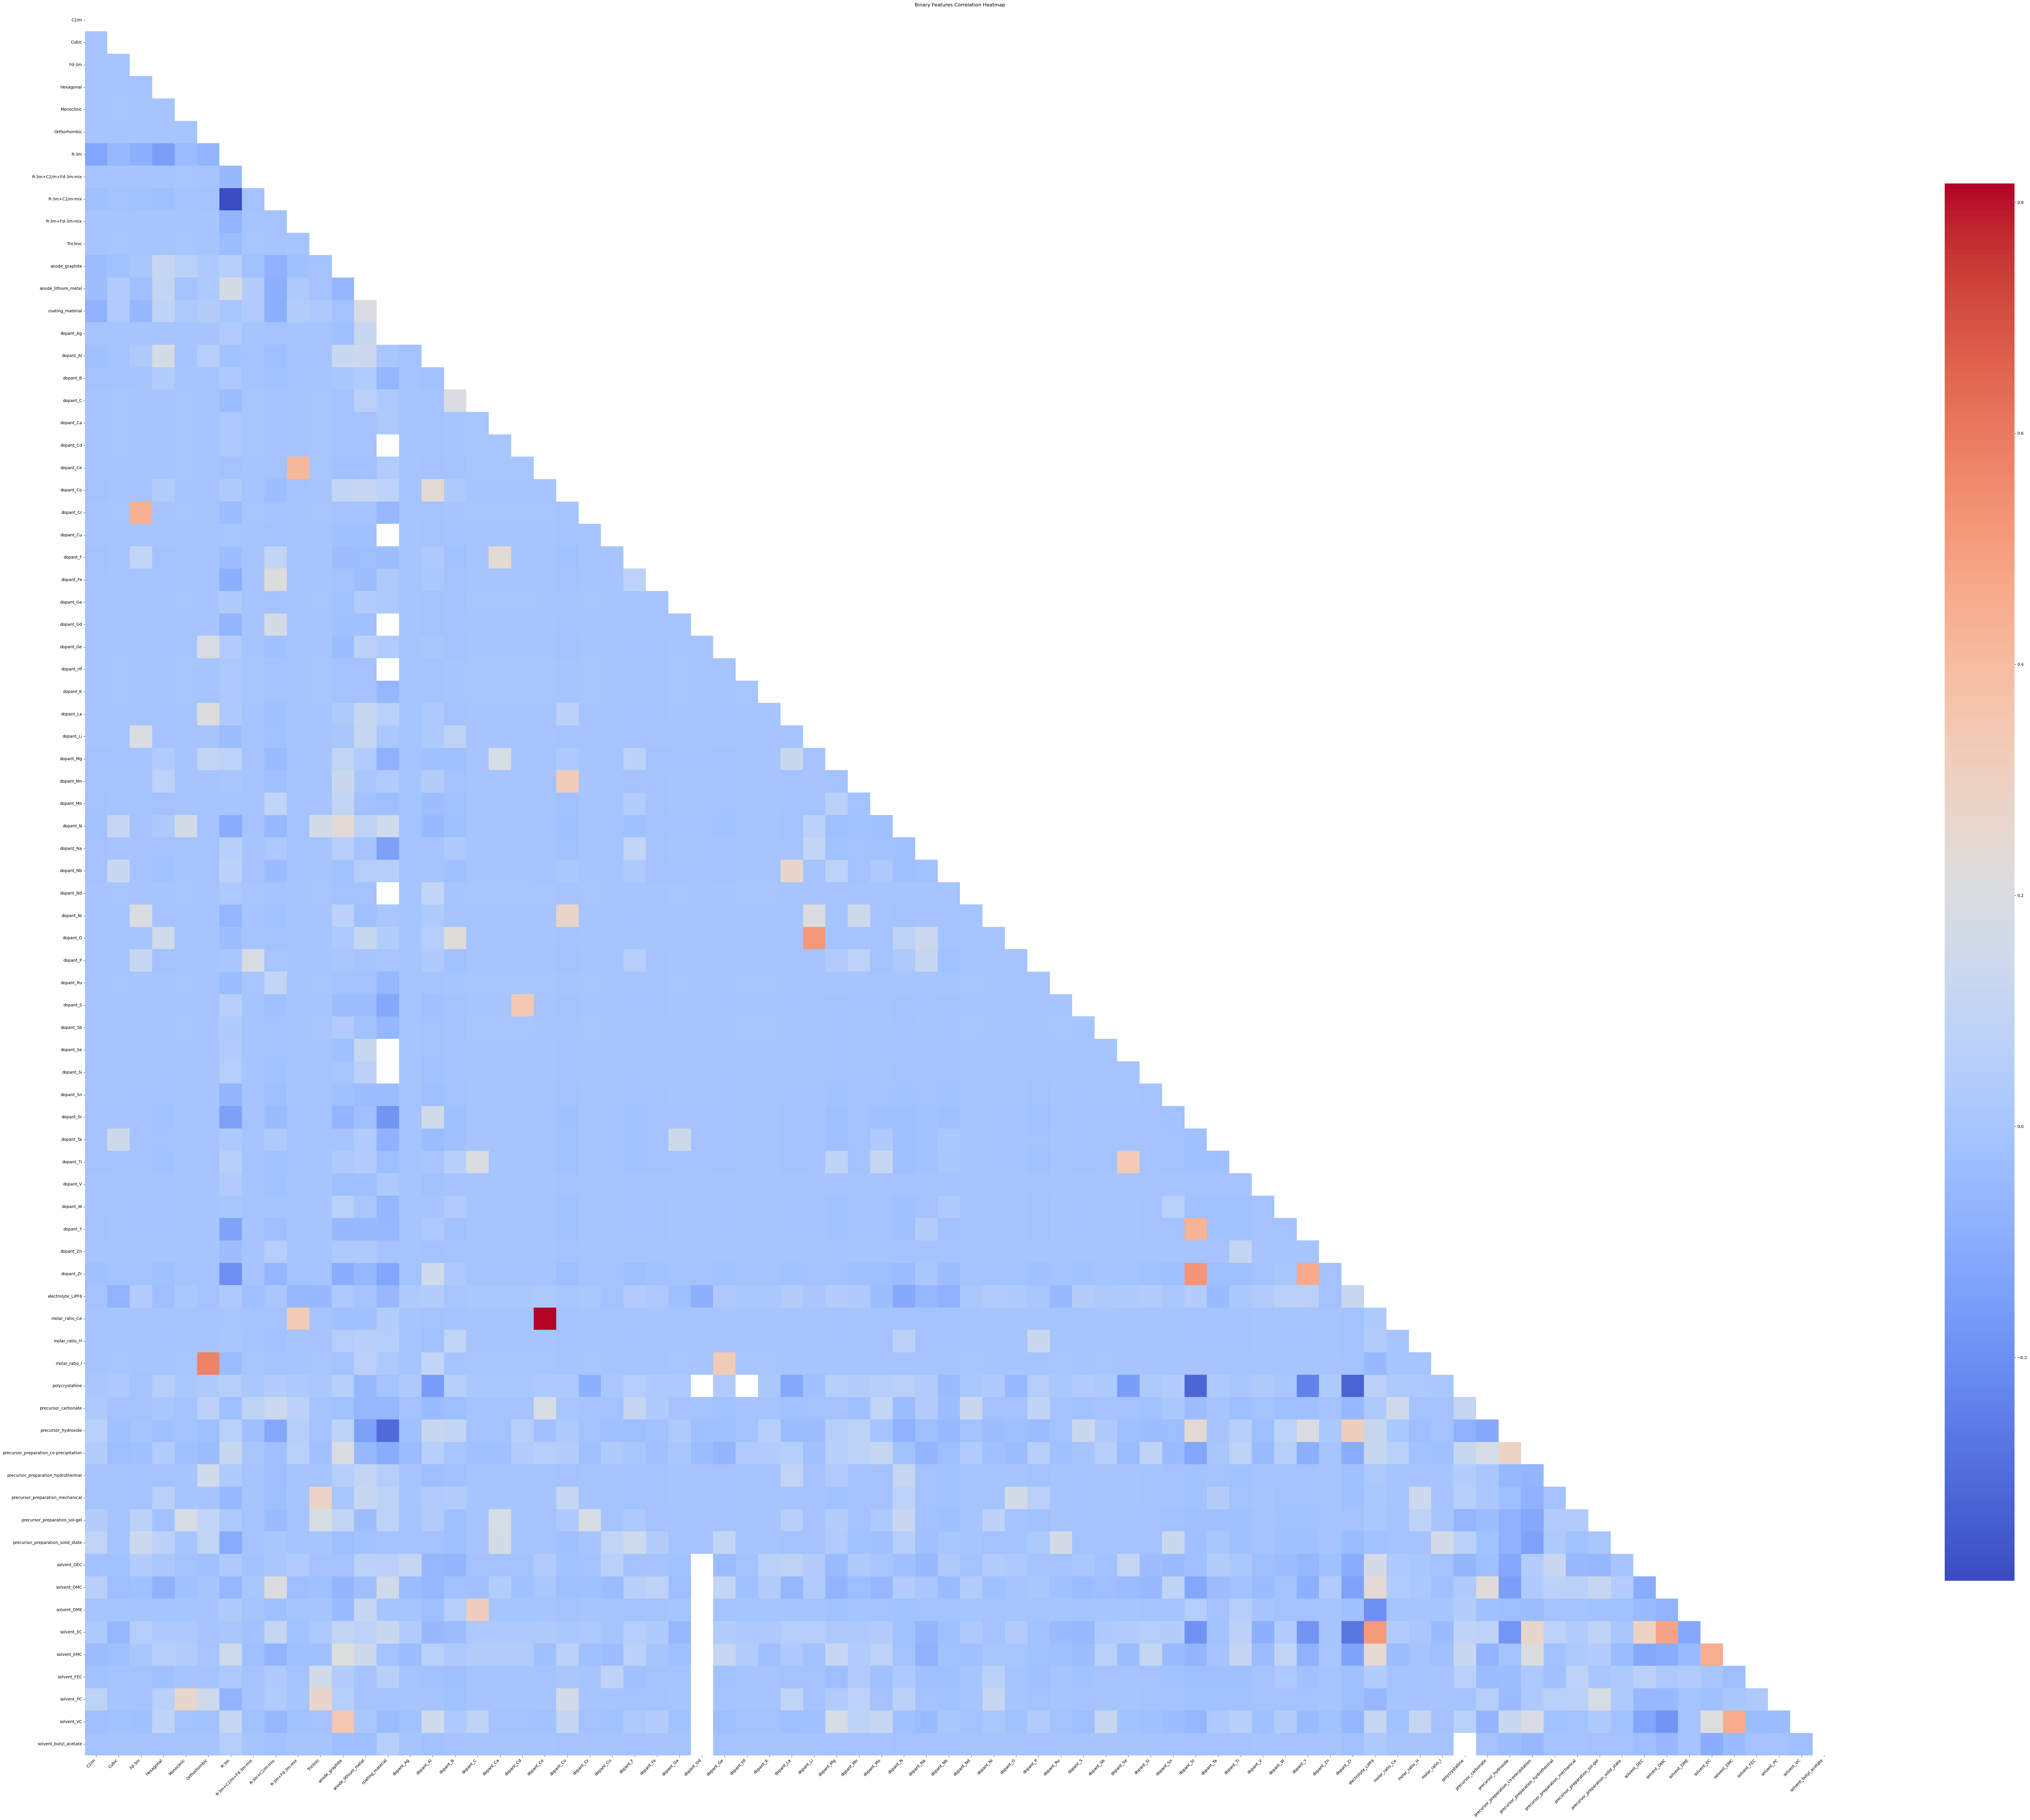

In [12]:
plot_correlation_heatmap(df=df_lessnulls_features_bin, save_dir=FEATURE_ENG_DIR, plot_title="Binary Features Correlation Heatmap")

## 8. Merge and Save Dataset

In [ ]:
processed_df = merge_dataframes(df_lessnulls_clip_features_cont, df_lessnulls_features_bin, df_targets)

In [ ]:
save_dataframe(df=processed_df, save_path=ENGINEERED_CSV_FILE)